# **Getaround - Delay Dataset EDA**
---
Author :
Christophe NORET

In [106]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

## Loading dataset

In [107]:
# Load the dataset
df = pd.read_excel("../data/get_around_delay_analysis_base.xlsx")

In [108]:
# Display the first few rows for a quick preview
print("Preview of the first few rows:")
df.head()

Preview of the first few rows:


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


## Dataset characteristics

In [109]:
# Display information about the columns and data types
print("\nInformation on columns and types:")
print(df.info())


Information on columns and types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21310 entries, 0 to 21309
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rental_id                                   21310 non-null  int64  
 1   car_id                                      21310 non-null  int64  
 2   checkin_type                                21310 non-null  object 
 3   state                                       21310 non-null  object 
 4   delay_at_checkout_in_minutes                16346 non-null  float64
 5   previous_ended_rental_id                    1841 non-null   float64
 6   time_delta_with_previous_rental_in_minutes  1841 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB
None


In [110]:
# Descriptive statistics
print("\nDescriptive statistics for numeric columns:")
display(df.describe())


Descriptive statistics for numeric columns:


,rental_id,car_id,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,16346.000000,1841.000000,1841.000000
mean,549712.880338,350030.603426,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,67.000000,560823.000000,540.000000
max,576401.000000,417675.000000,71084.000000,575053.000000,720.000000


## Missing values and duplicates

In [111]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [112]:
# Check for missing values in each column
missing_data = df.isnull().sum()
print("\nMissing data per column:")
print(missing_data)


Missing data per column:
rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64


In [113]:
# Fill missing values in 'delay_at_checkout_in_minutes' with 0 (no delay)
df['delay_at_checkout_in_minutes'] = df['delay_at_checkout_in_minutes'].fillna(0)

# Impute missing values for 'previous_ended_rental_id' and 'time_delta_with_previous_rental_in_minutes' with -1
df['previous_ended_rental_id'] = df['previous_ended_rental_id'].fillna(-1)

## Outliers

In [114]:
# Function to detect and handle outliers based on the IQR (Interquartile Range)
def handle_outliers(df, column_name, threshold_factor=1.5):
    # Calculate the IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column_name].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range (IQR)
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - threshold_factor * IQR  # Lower bound (1.5 * IQR below Q1)
    upper_bound = Q3 + threshold_factor * IQR  # Upper bound (1.5 * IQR above Q3)
    
    # Replace outliers with the bounds 
    df[column_name] = df[column_name].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
    return df

# Handle outliers for the 'delay_at_checkout_in_minutes' column
df = handle_outliers(df, 'delay_at_checkout_in_minutes')

# Handle outliers for the 'time_delta_with_previous_rental_in_minutes' column
df = handle_outliers(df, 'time_delta_with_previous_rental_in_minutes')

# Display statistics after handling outliers
df[['delay_at_checkout_in_minutes', 'time_delta_with_previous_rental_in_minutes']].describe()

,delay_at_checkout_in_minutes,time_delta_with_previous_rental_in_minutes
count,21310.000000,1841.000000
mean,10.350399,279.288430
std,64.046446,254.594486
min,-101.500000,0.000000
25%,-16.000000,60.000000
50%,0.000000,180.000000
75%,41.000000,540.000000
max,126.500000,720.000000


## Distribution Analysis

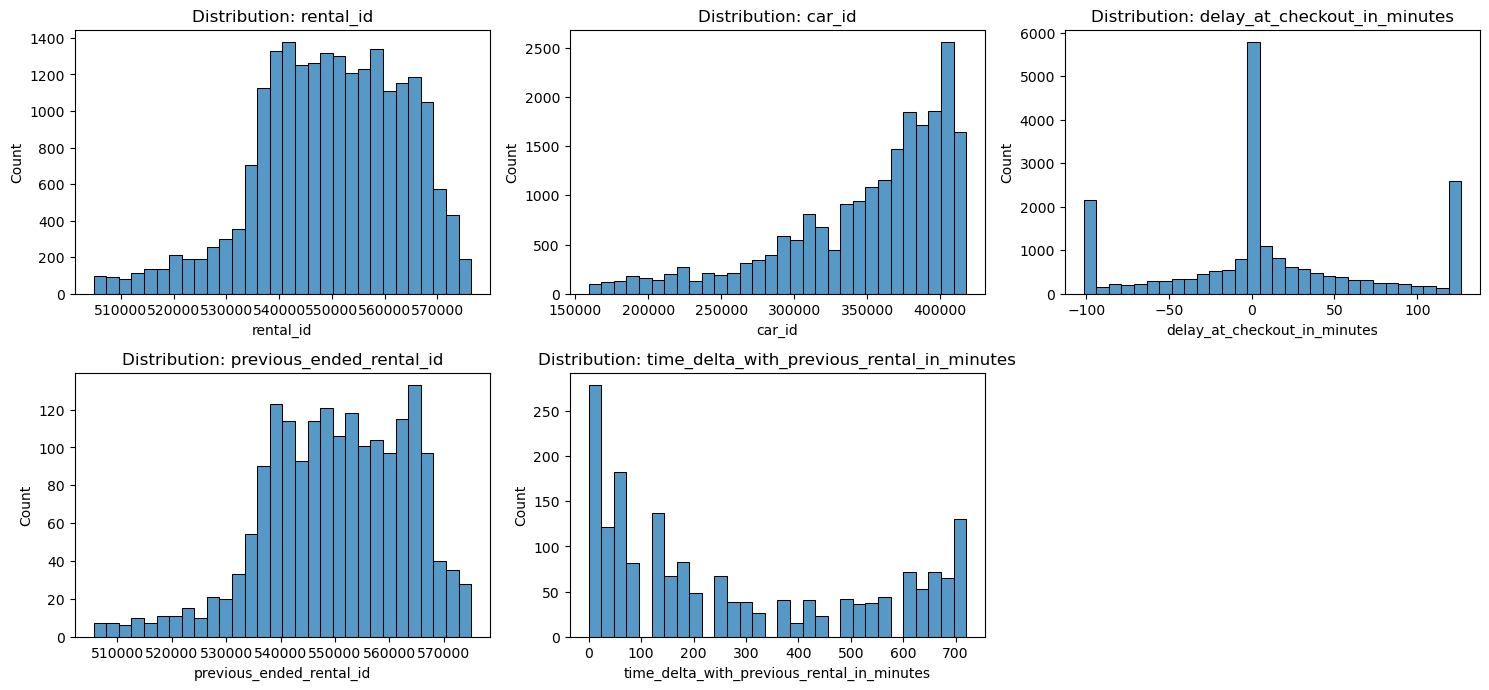

In [115]:
# Get all numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create the plot
plt.figure(figsize=(15, 10))

# Loop over numerical columns and plot their distributions
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    
    # Filter out -1 values from the column for visualization
    sns.histplot(df[df[column] != -1][column], kde=False, bins=30)
    
    # Add title for each plot
    plt.title(f'Distribution: {column}')

# Adjust the layout for better readability
plt.tight_layout()
plt.show()

In [116]:
# Count unique values for categorical columns
categorical_columns_pricing = df.select_dtypes(include=['object']).columns
for col in categorical_columns_pricing:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for checkin_type:
checkin_type
mobile     17003
connect     4307
Name: count, dtype: int64

Value counts for state:
state
ended       18045
canceled     3265
Name: count, dtype: int64


## Visualisation

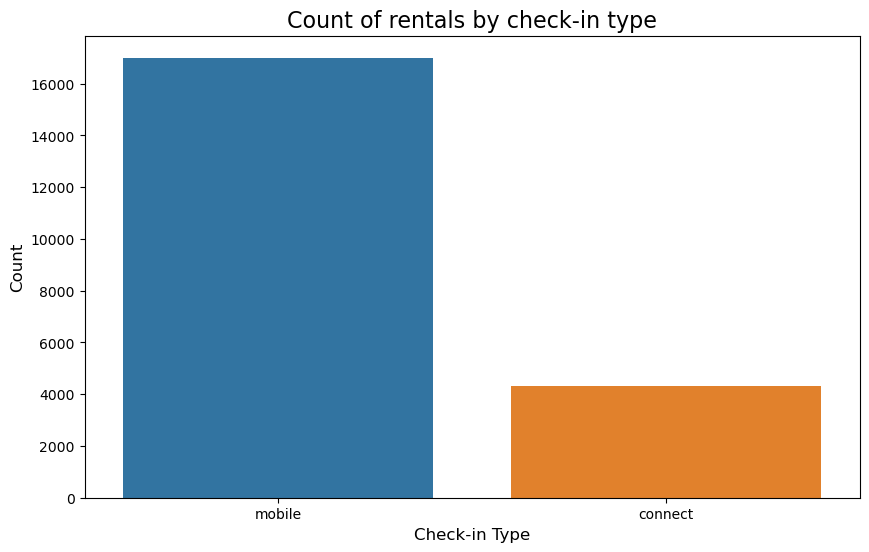

In [117]:
# Visualizing the count of rentals by check-in type and state
plt.figure(figsize=(10, 6))
sns.countplot(x='checkin_type', data=df, hue='checkin_type')
plt.title('Count of rentals by check-in type', fontsize=16)
plt.xlabel('Check-in Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


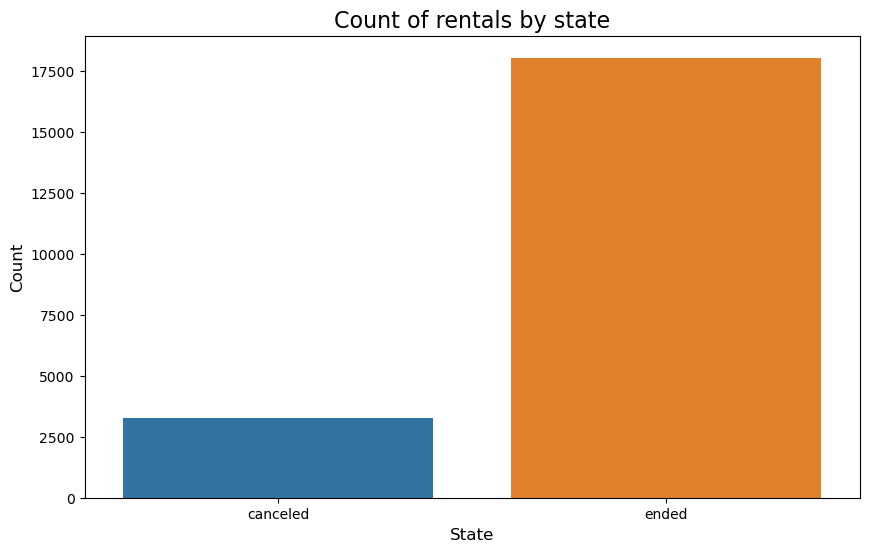

In [118]:
# Visualizing the count of rentals by state
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=df, hue='state')
plt.title('Count of rentals by state', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## Export to .csv

In [119]:
# Save the cleaned dataset to a CSV file
output_file_path_csv = '../data/get_around_delay_analysis.csv'
df.to_csv(output_file_path_csv, index=False)